In [1]:
import tradingeconomics as te
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
te.login('jupyter:jupyter'); # Signup for a free API key at https://developer.tradingeconomics.com/

'You are logged in as a jupyter:jupyter'

In [3]:
recent_data = te.getIndicatorData(country = 'all', indicators = ['unemployment rate'], output_type='df')
historic = te.getHistoricalData(country='all', indicator=['unemployment rate'], initDate='2018-01-31', endDate='2019-01-31', output_type='raw')

In [4]:
before_covid = []

for historic_elem in historic:
  if not any(name.get('Country') == historic_elem['Country'] for name in before_covid):
    before_covid.append({'Country':historic_elem['Country'], 'before_values' : historic_elem['Value']})

    
df_before = pd.DataFrame.from_dict(before_covid).rename(columns={'before_values': 'Before Covid(%)'}).set_index('Country')
df_recent = recent_data[['Country', 'LatestValue']].rename(columns={'LatestValue': 'Most Recent(%)'}).set_index('Country')


df = df_before.join(df_recent)

df['Difference(%)'] =  round(df['Most Recent(%)'] - df['Before Covid(%)'], 2)
df.sort_values(['Difference(%)'], ascending=False, inplace=True)

df=df.head(15)
print(df)

              Before Covid(%)  Most Recent(%)  Difference(%)
Country                                                     
Bahamas                  10.7            25.6           14.9
Panama                    6.0            18.5           12.5
Nigeria                  21.8            33.3           11.5
Costa Rica               10.3            18.5            8.2
Peru                      7.3            15.1            7.8
Jordan                   18.4            24.7            6.3
South Africa             26.7            32.6            5.9
Botswana                 17.9            23.3            5.4
Honduras                  5.7            10.9            5.2
Lithuania                 9.0            13.8            4.8
Turkey                    9.9            13.9            4.0
Barbados                  9.7            13.6            3.9
Suriname                  7.6            11.2            3.6
Chile                     6.8            10.2            3.4
Philippines             

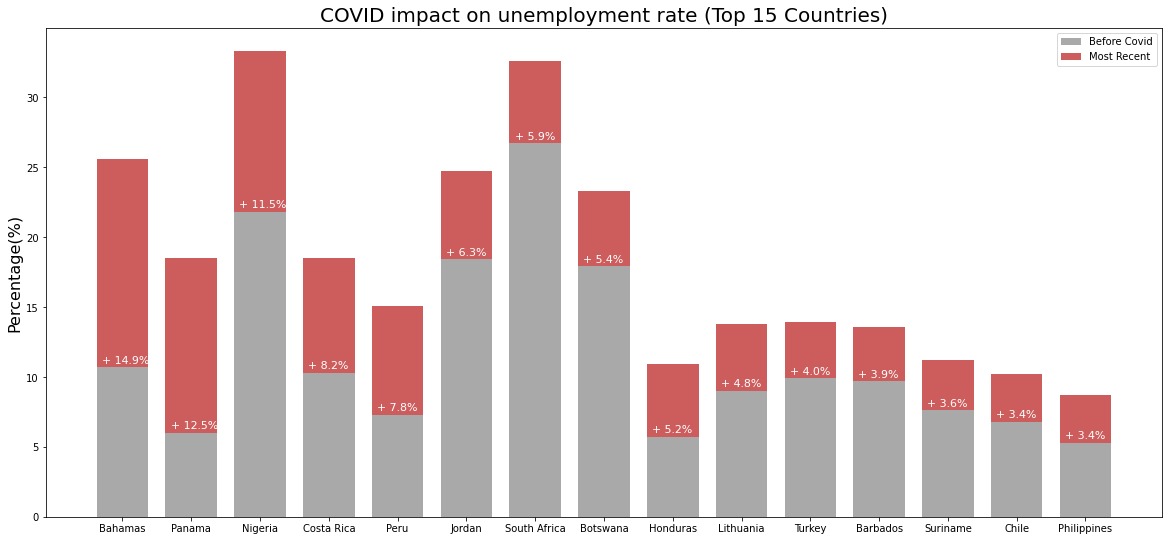

In [5]:
labels = df.index.tolist()
before_values = df['Before Covid(%)'].values.tolist()
difference_values = df['Difference(%)'].values.tolist()

width = 0.75    

fig, ax = plt.subplots(figsize=(20, 9))

ax.bar(labels, before_values, width, label='Before Covid',color='darkgrey')
ax.bar(labels, difference_values, width, bottom=before_values,
       label='Most Recent', color='indianred')

ax.set_ylabel('Percentage(%)', size=16)
ax.set_title('COVID impact on unemployment rate (Top 15 Countries)', color='black', size=20)
ax.legend()

for index,data in enumerate(difference_values):
        plt.text(x=index-0.3 , y =before_values[index]+0.3 , s=f"+ {data}%" , fontdict=dict(fontsize=11, color='white'))

plt.show()